# Final Project: Investigate a Dataset
    
I have chosen the ... 
## Titanic 
Dataset to investigate.

# Data Analysis Process
- Question
- Wrangle
- Explore
- Draw Conclusions
- Communicate

## Question
Some questions that come to mind are as follows:
- Who survived the disaster and why?
- Who did not survive the disaster and why?
- Is there correlations between features?



In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
transform_df = pd.read_csv(filename)
#Make a plot of your choice here showing something interesting about the titanic data.
#Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
#Once you've got something you're happy with, share it on the forums!

## Wrangle
### Nulls are Bad! 
Identify what features have missing values and determine if the missing values can be set to something besides null.


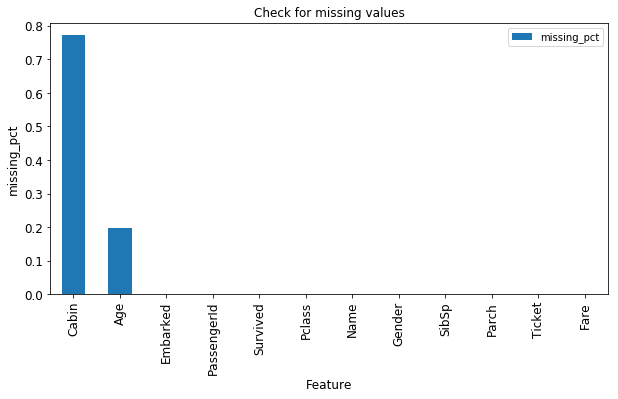

In [33]:
## Check for missing values
missing_values_df = pd.DataFrame(titanic_df.isnull().sum()/titanic_df.shape[0])
missing_values_df.index.name = 'Feature'
missing_values_df.columns = ['missing_pct']
missing_values_df.sort_values(['missing_pct'], ascending=[False], inplace=True)

ax = missing_values_df[['missing_pct']].plot(kind='bar', title ="Check for missing values", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("missing_pct", fontsize=12)
plt.show()


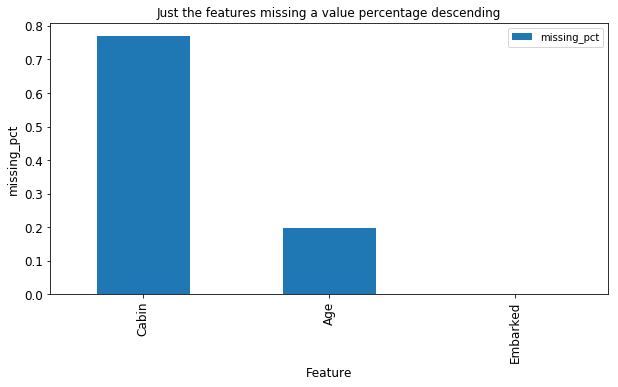

In [34]:
yoda_df = missing_values_df[missing_values_df['missing_pct'] > 0]

ax = yoda_df[['missing_pct']].plot(kind='bar', title ="Just the features missing a value percentage descending", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("missing_pct", fontsize=12)
plt.show()


## Wrangle 01 - Modify feature 'Age'
Transform the 'Age' feature by setting all null values to 0 initially.

In [35]:
transform_df['Age'].fillna(0, inplace=True)

if False:
    print(titanic_df['Age'].head(10))
    print(transform_df['Age'].head(10))


## Wrangle 02 - Modify feature 'Embarked'
Transform the 'Embarked' feature by setting all null values to (Blanks).

In [36]:
transform_df['Embarked'].fillna('(Blanks)', inplace=True)

if False:
    print(transform_df['Embarked'].head(10))


## Wrangle 03 - Create subroutine get_title
Create a subroutine that parses the name into a Title.

In [37]:
def get_title(name):
    comma = name.find(',')
    period = name.find('.')
    title = name[comma+2:period+1]
    return title

if False:
    print(get_title('Baumann, Mr. John D'))
    print(get_title('Boulos, Mr. Hanna'))
    print(get_title('Boulos, Mrs. Joseph (Sultana)'))
    print(get_title('Bourke, Miss. Mary'))
    print(get_title('Bradley, Mr. George ("George Arthur Brayton")'))
    print(get_title('Brewe, Dr. Arthur Jackson'))



## Wrangle 04 - Create feature 'Title'
Create a feature called 'Title' and populate it accordingly.

In [38]:
transform_df['Title'] = transform_df.apply(lambda row: get_title(row.Name), axis=1)

if False:
    print(transform_df['Title'].head(10))    


## Wrangle 05 - Set 'Age' to the median age for a given 'Title'
If 'Age' equals 0 then set 'Age' to the median age for a given 'Title'


In [39]:
title_group = transform_df.groupby('Title').size().reset_index(name='count')
title_list = title_group['Title']
for x in title_list:
    title_df = transform_df[transform_df['Title'] == x]
    agenonzero_df = title_df[title_df['Age'] != 0]
    title_age_median = np.mean(agenonzero_df['Age'])
    agezero_df = title_df[title_df['Age'] == 0]
    transform_df.loc[(transform_df['Title'] == x) & (transform_df['Age'] == 0), 'Age'] = title_age_median
    
if False:    
    print(transform_df['Age'].head(20))
    print(transform_df['Title'].head(20))


# Women and children first
From Wikipedia, the free encyclopedia
For other uses, see Women and children first (disambiguation).

Thomas Hemy's famous painting (circa 1892) of soldiers standing fast on HMS Birkenhead while the women and children head off in a lifeboat in the background
"Women and children first" (or to a lesser extent, the Birkenhead Drill[1][2]) is a code of conduct dating from 1852, whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited.

# Child
From Wikipedia, the free encyclopedia
This article is about the juvenile human. For other uses, see Child (disambiguation).
"Children" redirects here. For other uses, see Children (disambiguation).
Biologically, a child (plural: children) is a human being between the stages of birth and puberty.[1][2] The legal definition of child generally refers to a minor, otherwise known as a person younger than the age of majority.[1]

## Legal, biological, social definitions[edit]

Children playing ball games, Roman artwork, 2nd century AD
Legally, the term "child" may refer to anyone below the age of majority or some other age limit. The United Nations Convention on the Rights of the Child defines child as "a human being below the age of 18 years unless under the law applicable to the child, majority is attained earlier".[5] This is ratified by 192 of 194 member countries. The term "child" may also refer to someone below another legally defined age limit unconnected to the age of majority. In Singapore, for example, a "child" is legally defined as someone under the age of 14 under the "Children and Young Persons Act" whereas the age of majority is 21.[6][7] In U.S. Immigration Law, a child refers to anyone who is under the age of 21.[8]



## Wrangle 6 - Create subroutines get_AgeGroupId and get_AgeGroup
The get_AgeGroupId/get_AgeGroup subroutines will start with an age group that is considered a child which is anyone who is under the age of 21.
Other age groups are in groups of 20 years.
Creating the AgeGroupId to see if it will be included in the correlation heatmap.

In [40]:
def get_AgeGroupId(age):
    if age < 21:
        return 1
    if age < 41:
        return 2
    if age < 61:
        return 3
    if age < 81:
        return 4
    else:
        return 5

def get_AgeGroup(age):
    if age < 21:
        return '1: 0-20'
    if age < 41:
        return '2: 21-40'
    if age < 61:
        return '3: 41-60'
    if age < 81:
        return '4: 61-80'
    else:
        return '5: 80+'

if False:
    print(get_AgeGroupId(0)) 
    print(get_AgeGroupId(55)) 
    print(get_AgeGroupId(100))
    print(get_AgeGroup(0)) 
    print(get_AgeGroup(55)) 
    print(get_AgeGroup(100))
    


## Wrangle 07 - Create features 'AgeGroupId' and 'AgeGroup'
Create features called 'AgeGroupId' and 'AgeGroup' based on the 'Age' of the passenger.

In [228]:
transform_df['AgeGroupId'] = transform_df.apply(lambda row: get_AgeGroupId(row.Age), axis=1)
transform_df['AgeGroup'] = transform_df.apply(lambda row: get_AgeGroup(row.Age), axis=1)

if False:
    print(transform_df['AgeGroupId'].head(10))    
    print(transform_df['AgeGroup'].head(10))    


## Wrangle 08 - Create subroutines get_FareGroupId and get_FareGroup
Create subroutines get_FareGroupId and get_FareGroup which is to help determine if the quantity of the fare has any relationship to survival.
i.e. if a passenger paid a substantial amount of money for their fare one might consider them as having "deep pockets".
"Deep Pocket" passengers might be able to persuade a life boat officer (i.e. by greasing their palms/bribery) to let them onto a life boat.
Creating the FareGroupId to see if it will be included in the correlation heatmap.

In [229]:
def get_FareGroupId(fare, mean):
    intmean = int(mean)
    inthalfmean = int(mean/2)
    intdoublemean = int(mean*2)
    if fare < mean:
        if fare < (mean/2):
            return 1
        else:
            return 2
    if fare > mean:
        if fare < (mean*2):
            return 3
        else:
            return 4

def get_FareGroup(fare, mean):
    intmean = int(mean)
    inthalfmean = int(mean/2)
    intdoublemean = int(mean*2)
    if fare < mean:
        if fare < (mean/2):
            return '1: 0-'+str(inthalfmean-1)
        else:
            return '2: '+str(inthalfmean)+'-'+str(intmean-1)
    if fare > mean:
        if fare < (mean*2):
            return '3: '+str(intmean)+'-'+str(intdoublemean-1)
        else:
            return '4: '+str(intdoublemean)+'+'

if False:
    print(get_FareGroupId(15,32.204207968574636)) 
    print(get_FareGroupId(31,32.204207968574636)) 
    print(get_FareGroupId(32,32.204207968574636)) 
    print(get_FareGroupId(33,32.204207968574636)) 
    print(get_FareGroupId(65,32.204207968574636)) 
    print(get_FareGroupId(32.204207968574636,32.204207968574636))
    print(get_FareGroup(15,32.204207968574636)) 
    print(get_FareGroup(31,32.204207968574636)) 
    print(get_FareGroup(32,32.204207968574636)) 
    print(get_FareGroup(33,32.204207968574636)) 
    print(get_FareGroup(65,32.204207968574636)) 
    print(get_FareGroup(32.204207968574636,32.204207968574636))    

## Wrangle 09 - Create features 'FareGroupId' and 'FareGroup'
Create features called 'FareGroupId' and 'FareGroup' based on the 'Fare' of the passenger.

In [232]:
faremean = transform_df['Fare'].mean()
transform_df['FareGroupId'] = transform_df.apply(lambda row: get_FareGroupId(row.Fare, faremean), axis=1)
transform_df['FareGroup'] = transform_df.apply(lambda row: get_FareGroup(row.Fare, faremean), axis=1)

if False:
    print(transform_df['FareGroupId'].head(10))
    print(transform_df['FareGroup'].head(10))


## Wrangle 10 - Create subroutine get_CabinId
Create subroutine get_CabinId which will take the first character of the Cabin value and return a corresponding number.
i.e. a = 1, b = 2, z = 26


In [231]:
def get_CabinId(cabin):
    character = cabin[:1].lower()
    number = ord(character) - 96
    return number

if False:
    print(get_CabinId('A123'))
    print(get_CabinId('B007'))
    print(get_CabinId('Zorro'))




## Wrangle 11 - Create feature 'CabinId'
Create feature called 'CabinId' based on the first character of the 'Cabin' translated into a number.

In [233]:
transform_df['Cabin'].fillna('Z', inplace=True)
transform_df['CabinId'] = transform_df.apply(lambda row: get_CabinId(row.Cabin), axis=1)

if False:
    print(transform_df['CabinId'].head(10))


## Wrangle 12 - Create subroutine get_TicketPreOrNum
Create subroutine get_TicketPreOrNum which will parse the ticket number into two parts: a ticket prefix and a ticket number


In [234]:
import re

def get_TicketPreOrNum(ticket, pre_or_num):
    TicketPre = ''
    TicketNum = ''
    rx = re.compile(r'(.* )?([0-9]+)')
    parsed_ticket = rx.findall(ticket)
    for x in parsed_ticket:
        TicketPre = x[0]
        TicketNum = x[1]
    if pre_or_num == 'Pre':
        return TicketPre
    if pre_or_num == 'Num':
        return TicketNum

if False:
    print(get_TicketPreOrNum('A/5 21171', 'Pre'))
    print(get_TicketPreOrNum('A/5 21171', 'Num'))
    print(get_TicketPreOrNum('PC 17599', 'Pre'))
    print(get_TicketPreOrNum('PC 17599', 'Num'))
    print(get_TicketPreOrNum('STON/O2. 3101282', 'Pre'))
    print(get_TicketPreOrNum('STON/O2. 3101282', 'Num'))
    print(get_TicketPreOrNum('LINE', 'Pre'))
    print(get_TicketPreOrNum('LINE', 'Num'))
    print(get_TicketPreOrNum('SC/AH Basle 541', 'Pre'))
    print(get_TicketPreOrNum('SC/AH Basle 541', 'Num'))
    print(get_TicketPreOrNum('113803', 'Pre'))
    print(get_TicketPreOrNum('113803', 'Num'))
    



## Wrangle 13 - Create subroutine TicketPre_replace
Create subroutine TicketPre_replace which will replace certain characters found in the TicketPre feature with nulls.


In [240]:
def TicketPre_replace(TicketPre):
    TicketPre = TicketPre.upper()
    TicketPre = TicketPre.replace("/","")
    TicketPre = TicketPre.replace(".","")
    TicketPre = TicketPre.replace(" ","")
    return TicketPre


## Wrangle 14 - Create features 'TicketPre' and 'TicketNum' from feature 'Ticket'
Create features called 'TicketPre' and 'TicketNum'. 'Ticket' is parsed into a 'TicketPre'fix and a 'TicketNum'ber by calling 'get_TicketPreOrNum'.

## Wrangle 15 - In feature 'TicketPre' replace certain characters with nulls.
Look for similarities in the ticket prefix to see if similarities can be combined.
Reduced TicketPre from 44 to 29.

In [245]:
transform_df['TicketPre'] = transform_df.apply(lambda row: get_TicketPreOrNum(row.Ticket, 'Pre'), axis=1)
transform_df['TicketNum'] = transform_df.apply(lambda row: get_TicketPreOrNum(row.Ticket, 'Num'), axis=1)

if False:
    print(transform_df['TicketPre'].head(10))
    print(transform_df['TicketNum'].head(10))
    print(ticketpregroup)

TicketPreBefore = transform_df.groupby('TicketPre').size().reset_index(name='count')
print(TicketPreBefore)
beforeReplace = len(TicketPreBefore.index)
print("TicketPre before replace = "+str(beforeReplace))
transform_df['TicketPre'] = transform_df.apply(lambda row: TicketPre_replace(row.TicketPre), axis=1)
TicketPreAfter = transform_df.groupby('TicketPre').size().reset_index(name='count')
print(TicketPreAfter)
afterReplace = len(TicketPreAfter.index)
print("TicketPre after replace = "+str(afterReplace))
print("Reduced TicketPre from "+str(beforeReplace)+" to "+str(afterReplace)+".")


       TicketPre  count
0                   665
1         A./5.       2
2          A.5.       2
3           A/4       3
4          A/4.       3
5           A/5      10
6          A/5.       7
7           A/S       1
8           A4.       1
9             C       5
10         C.A.      27
11   C.A./SOTON       1
12           CA       6
13          CA.       8
14         F.C.       1
15       F.C.C.       5
16           Fa       1
17         P/PP       2
18           PC      60
19           PP       3
20    S.C./A.4.       1
21   S.C./PARIS       2
22    S.O./P.P.       3
23       S.O.C.       5
24       S.O.P.       1
25         S.P.       1
26      S.W./PP       1
27           SC       1
28        SC/AH       2
29  SC/AH Basle       1
30     SC/PARIS       5
31     SC/Paris       4
32        SCO/W       1
33         SO/C       1
34   SOTON/O.Q.       8
35     SOTON/O2       2
36     SOTON/OQ       7
37    STON/O 2.      12
38     STON/O2.       6
39        SW/PP       1
40        W./C. 

## Wrangle 16 - Transform feature 'Age' by rounding the float and converting the float to an integer
This is done so that I can plot ages specifically for passengers under the age of majority. Did all children survive?

In [247]:
transform_df['Age'] = transform_df['Age'].round(0).astype(int)


## Explore 01 - draw a histogram of 'Age'

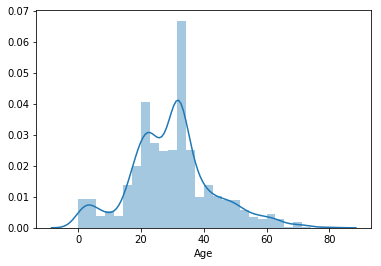

In [201]:
sns.distplot(transform_df.Age.dropna())
plt.show()


## Explore 02 - draw a Facet Grid of 'Survived'/'Pclass' combination with 'Age' on the x-axis

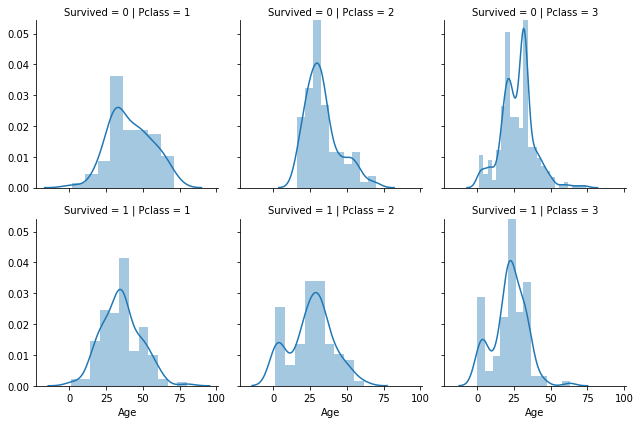

In [249]:
g = sns.FacetGrid(transform_df, row='Survived', col='Pclass')
g.map(sns.distplot, "Age")
plt.show()


## Explore 03 - draw a pearson's joint plot based of 'Age'/'Fare' correlation

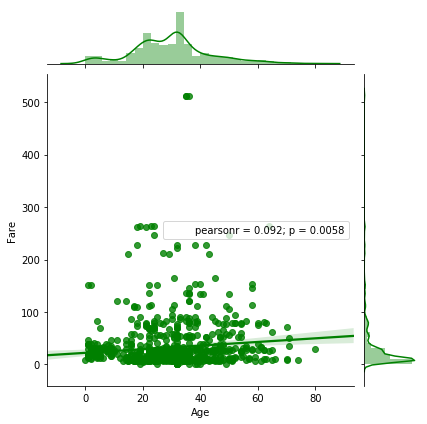

In [250]:
sns.jointplot(data=transform_df, x='Age', y='Fare', kind='reg', color='g')
plt.show()


## Explore 04 - draw a pearson's joint plot based of 'SibSp'/'Parch' correlation

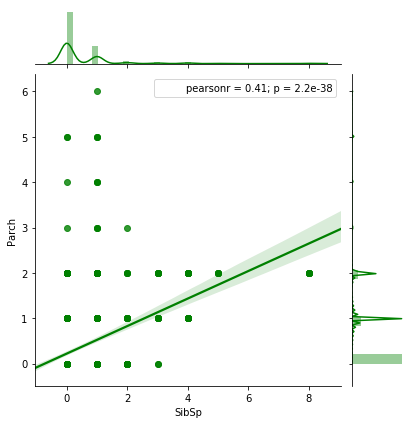

In [251]:
sns.jointplot(data=transform_df, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()


## Explore 05 - draw a heatmap based of 'Embarked'/'AgeGroupId' correlation using 'FareGroupId' values

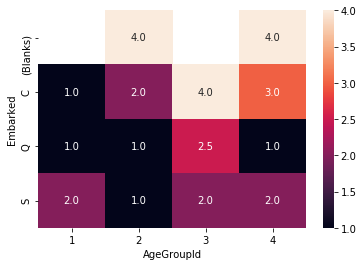

In [205]:
df = transform_df.pivot_table(index='Embarked', columns='AgeGroupId', values='FareGroupId', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")


## Explore 06 - draw a correlation matrix heatmap
- correlation matrix will only consist of features that are numerical in nature (i.e. can be summed, meaned, std etc.)
- feature 'PassengerId' is deleted from the transformation dataframe so that it is not included in the correlation matrix
- feature 'Age' and 'AgeGroupId' has a 0.91 pearson's r which makes sense since 'AgeGroupId' is derived from 'Age'
- feature 'Fare' and 'FareGroupId' has a 0.74 person's r which makes sense since 'FareGroupId' is derived from 'Fare'
- feature 'Pclass' and 'CabinId' has a 0.74 pearson's r which is something that should be investigated further
- feature 'SibSp' aka 'Sibling/Spouse' and 'Parch' aka 'Parent/Child' has a 0.74 pearson's r which is something that should be investigated further


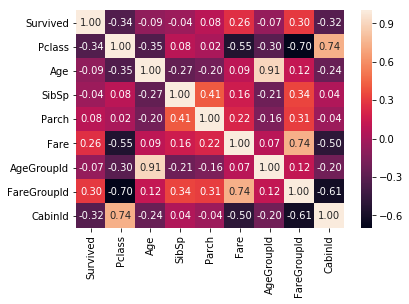

In [253]:
if 'PassengerId' in transform_df.columns:
    del transform_df['PassengerId']

correlation_matrix = transform_df

sns.heatmap(correlation_matrix.corr(), annot=True, fmt=".2f")

## Wrangle - create smaller data subsets from the transformed dataframe
- dead: Survived == 0
- alive: Survived == 1
- child_alive: alive where Age < 21 - where 'child' is defined as a person whose age is less than the age of majority. the age of majority is 21.
- child_dead: dead where Age < 21
- child_female_alive: child_alive where Gender == 'female'
- child_female_dead: child_dead where Gender == 'female'
- child_male_alive: child_alive where Gender == 'male'
- child_male_dead: child_dead where Gender == 'male'
- female_alive: alive where Gender == 'female'
- female_dead: dead where Gender == 'female'
- male_alive: alive where Gender == 'male'
- male_dead: dead where Gender == 'male'


In [254]:
dead = transform_df[transform_df['Survived'] == 0]
alive = transform_df[transform_df['Survived'] == 1]

child_alive = alive[alive['Age'] < 21]
child_dead = dead[dead['Age'] < 21]
child_female_alive = child_alive[child_alive['Gender'] == 'female']
child_female_dead = child_dead[child_dead['Gender'] == 'female']
child_male_alive = child_alive[child_alive['Gender'] == 'male']
child_male_dead = child_dead[child_dead['Gender'] == 'male']

female_alive = alive[alive['Gender'] == 'female']
female_dead = dead[dead['Gender'] == 'female']
male_alive = alive[alive['Gender'] == 'male']
male_dead = dead[dead['Gender'] == 'male']


## def plot_survival_count
### Object: plot_survival_count
### Purpose: To plot a bar chart with stacked alive and dead (survival) data with counts
### Parameters:
    - alive dataframe
    - dead dataframe
    - plot_title
    - xlabel
    - ylabel
    

In [255]:
def plot_survival_count(alive, dead, plot_title, xlabel, ylabel):
    alive_group = alive.groupby([xlabel]).size().reset_index(name='Alive')
    dead_group = dead.groupby([xlabel]).size().reset_index(name='Dead')
    
    merge_dead_and_alive = pd.merge(alive_group, dead_group, how='outer', on=xlabel)
    merge_dead_and_alive['Alive'].fillna(0, inplace=True)
    merge_dead_and_alive['Dead'].fillna(0, inplace=True)

    plot_df = merge_dead_and_alive
    plot_df.set_index(xlabel, inplace=True)
    plot_df.sort_values(['Alive'], ascending=[False], inplace=True)
    
    my_plot = plot_df.plot(kind='bar',stacked=True,title=plot_title)
    my_plot.set_xlabel(xlabel)
    my_plot.set_ylabel(ylabel)
    plt.show()

## def plot_survival_rates
### Object: plot_survival_rates
### Purpose: To plot a bar chart with stacked alive and dead (survival) data with percentage rates
### Parameters:
    - alive dataframe
    - dead dataframe
    - plot_title
    - xlabel
    - ylabel
    

In [256]:
def plot_survival_rates(alive, dead, plot_title, xlabel, ylabel):
    alive_group = alive.groupby([xlabel]).size().reset_index(name='AliveCount')
    dead_group = dead.groupby([xlabel]).size().reset_index(name='DeadCount')
    merge_dead_and_alive = pd.merge(alive_group, dead_group, how='outer', on=xlabel)

    merge_dead_and_alive['AliveCount'].fillna(0, inplace=True)
    merge_dead_and_alive['DeadCount'].fillna(0, inplace=True)

    merge_dead_and_alive['Alive'] = (merge_dead_and_alive['AliveCount']/(merge_dead_and_alive['DeadCount']+merge_dead_and_alive['AliveCount']))*100
    merge_dead_and_alive['Dead'] = (merge_dead_and_alive['DeadCount']/(merge_dead_and_alive['DeadCount']+merge_dead_and_alive['AliveCount']))*100

    del merge_dead_and_alive['AliveCount']
    del merge_dead_and_alive['DeadCount']

    plot_df = merge_dead_and_alive
    plot_df.set_index(xlabel, inplace=True)
    plot_df.sort_values(['Alive'], ascending=[False], inplace=True)
    
    my_plot = plot_df.plot(kind='bar',stacked=True,title=plot_title)
    my_plot.set_xlabel(xlabel)
    my_plot.set_ylabel(ylabel)
    plt.show()


## Explore Child Survival Counts/Rates
- all children
- female children
- male children

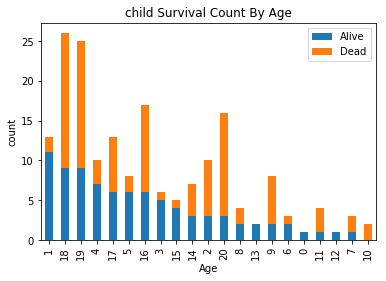

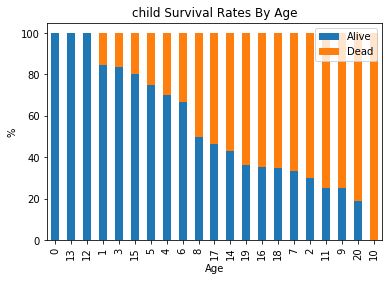

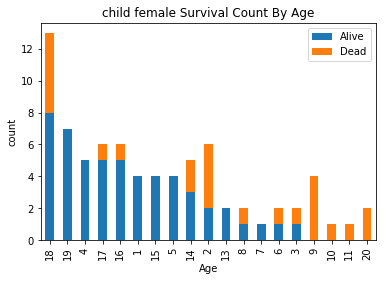

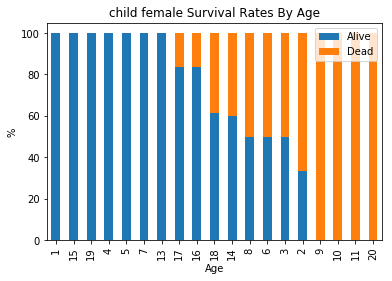

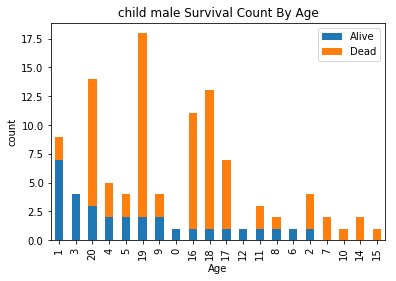

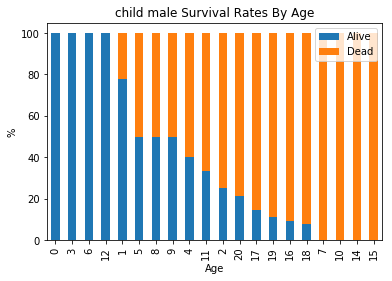

In [257]:
xlabel = 'Age'
plot_survival_count(child_alive, child_dead, 'child Survival Count By '+xlabel, xlabel, 'count')
plot_survival_rates(child_alive, child_dead, 'child Survival Rates By '+xlabel, xlabel, '%')
plot_survival_count(child_female_alive, child_female_dead, 'child female Survival Count By '+xlabel, xlabel, 'count')
plot_survival_rates(child_female_alive, child_female_dead, 'child female Survival Rates By '+xlabel, xlabel, '%')
plot_survival_count(child_male_alive, child_male_dead, 'child male Survival Count By '+xlabel, xlabel, 'count')
plot_survival_rates(child_male_alive, child_male_dead, 'child male Survival Rates By '+xlabel, xlabel, '%')



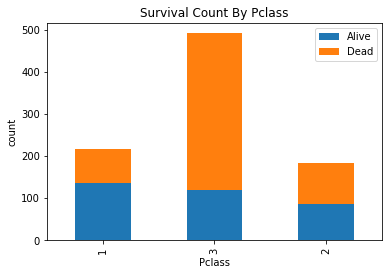

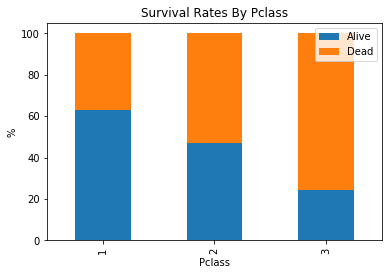

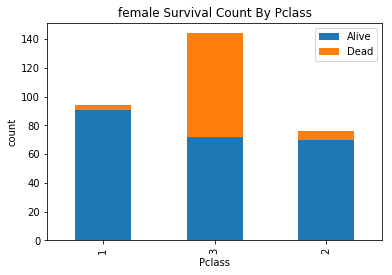

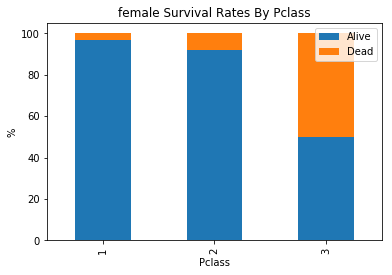

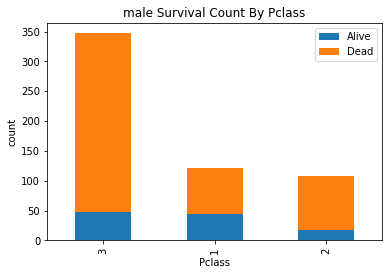

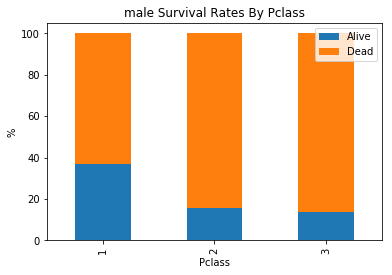

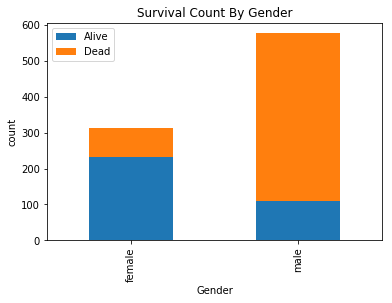

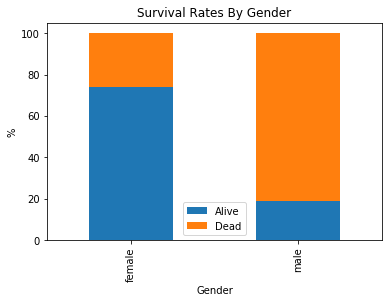

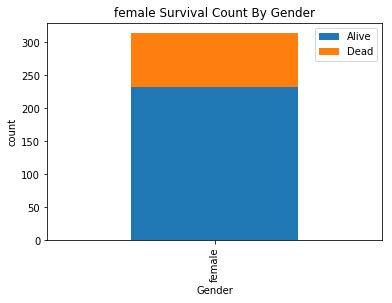

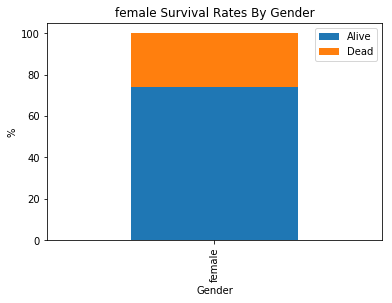

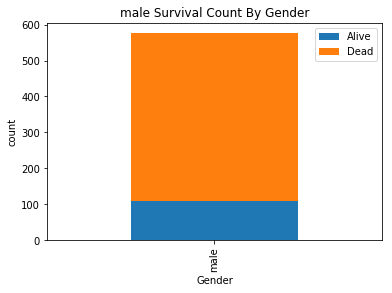

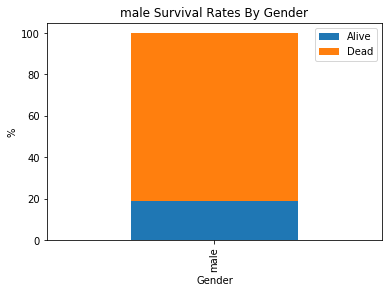

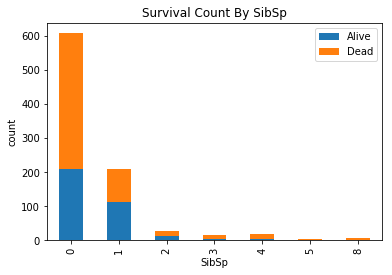

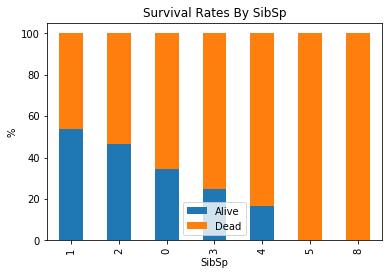

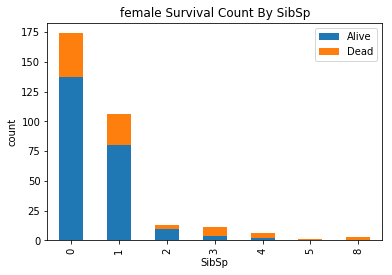

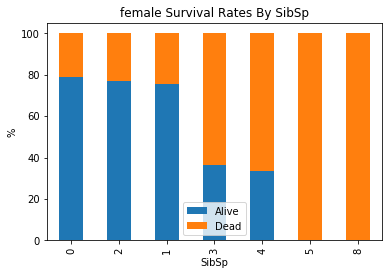

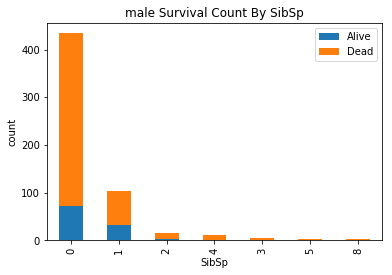

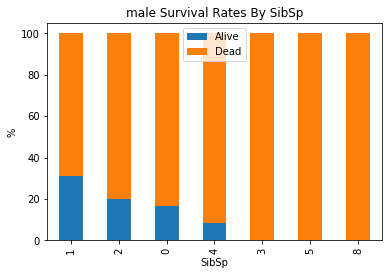

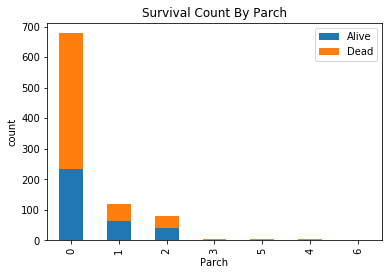

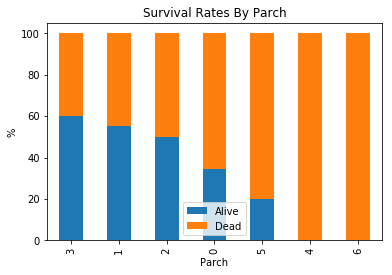

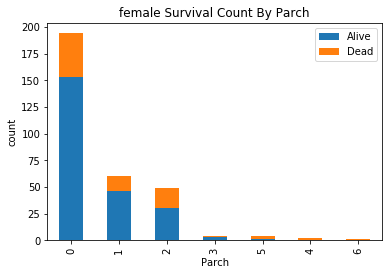

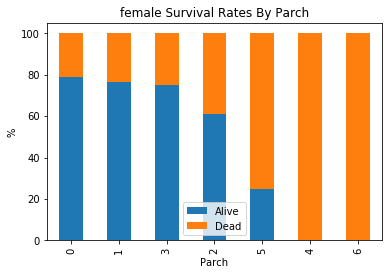

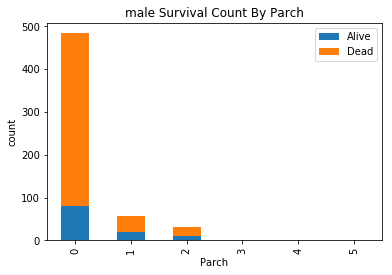

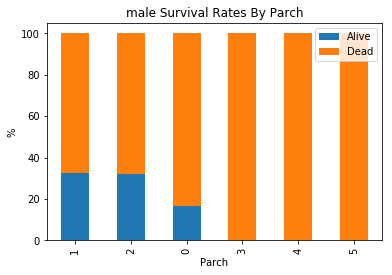

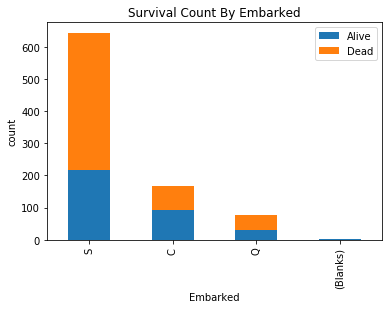

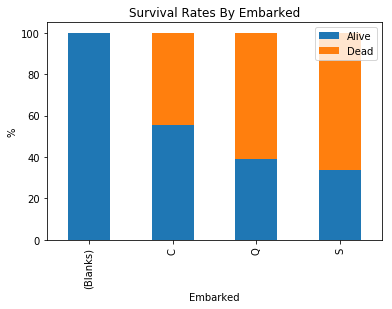

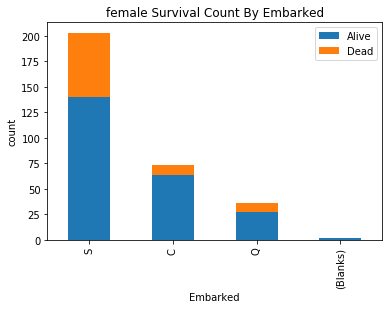

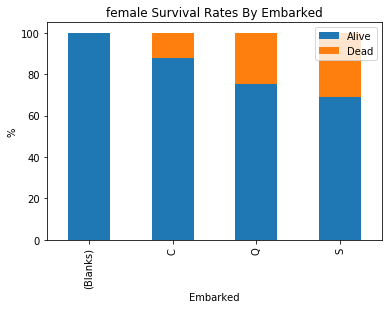

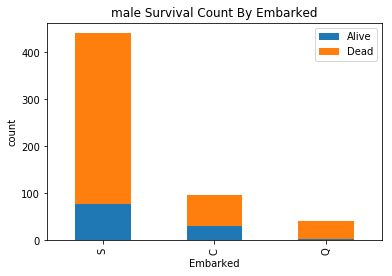

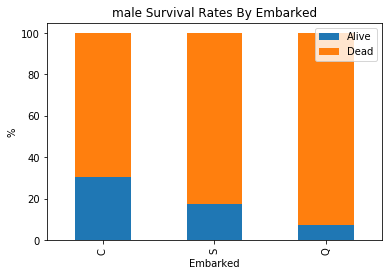

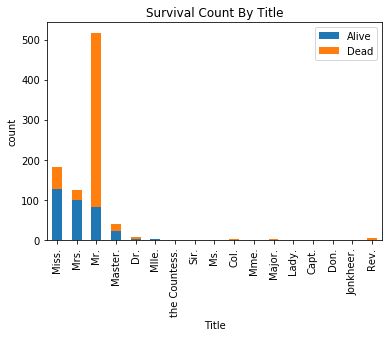

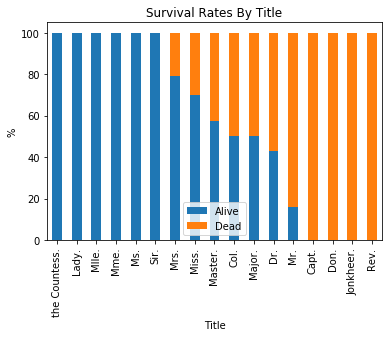

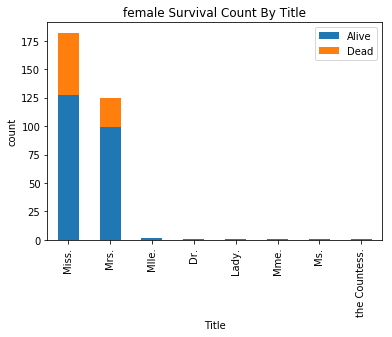

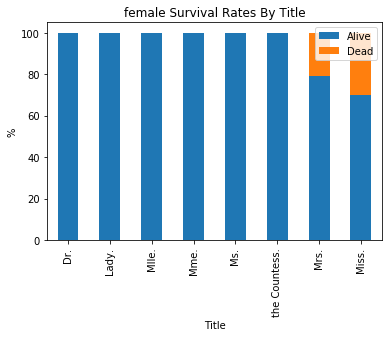

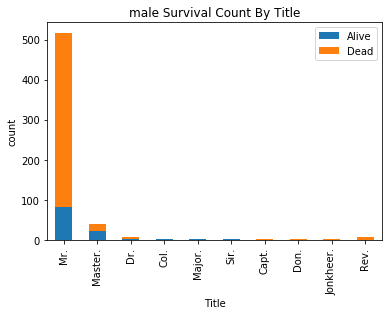

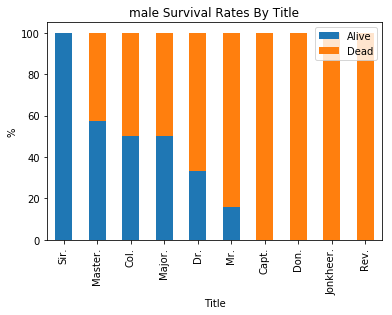

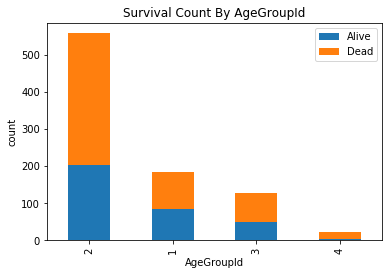

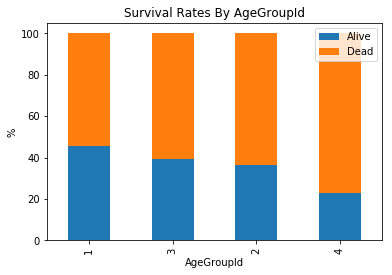

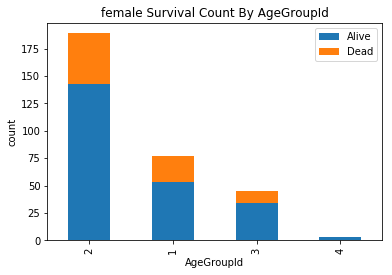

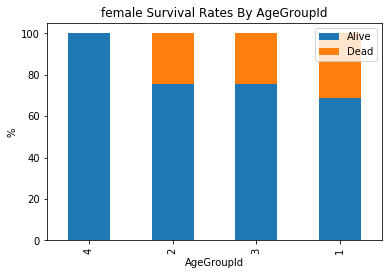

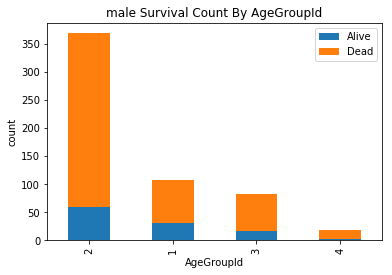

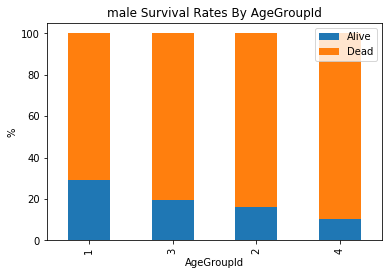

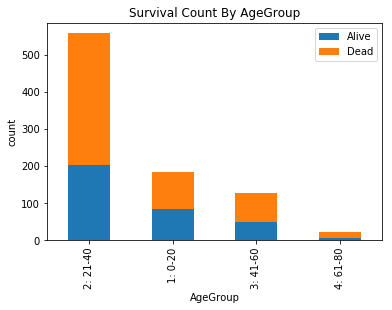

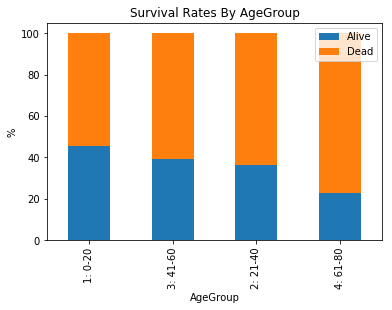

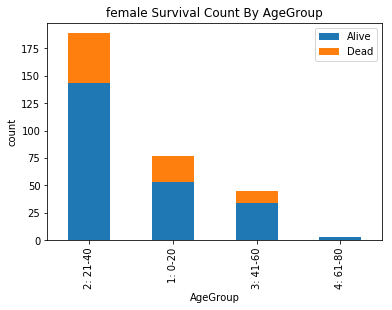

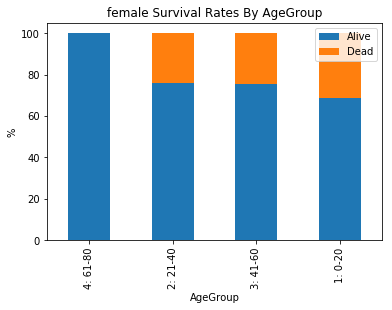

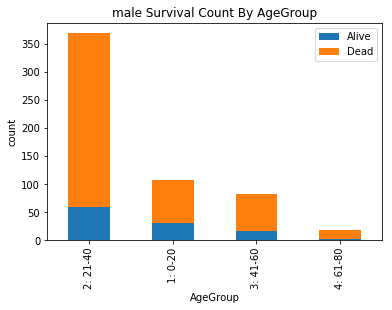

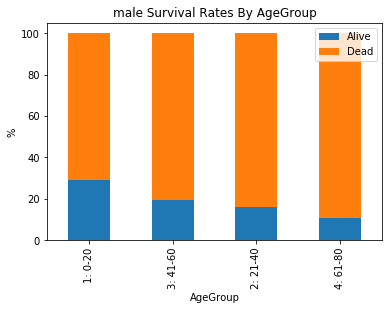

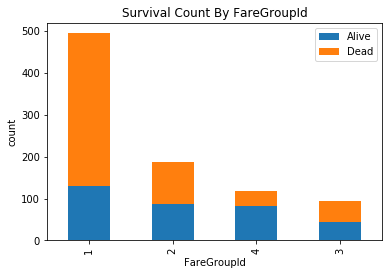

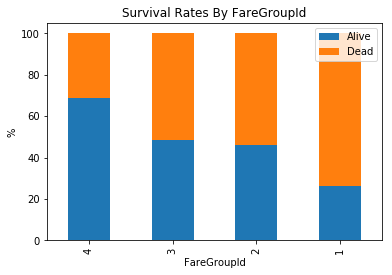

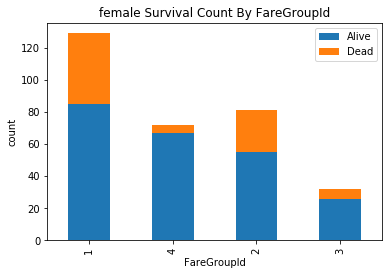

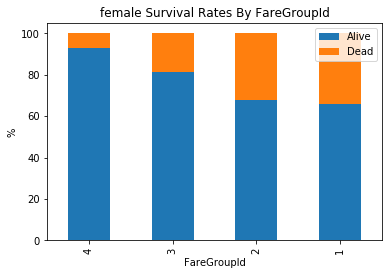

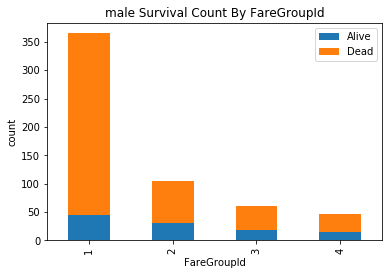

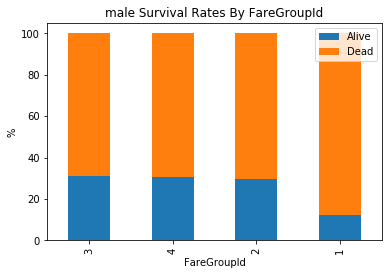

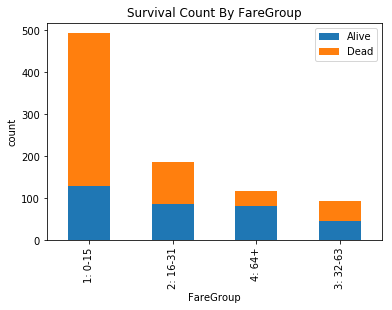

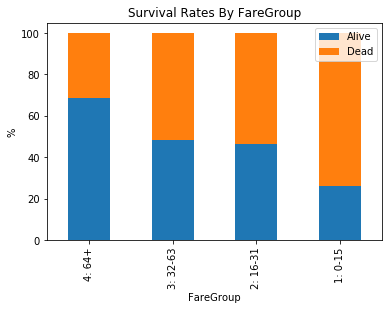

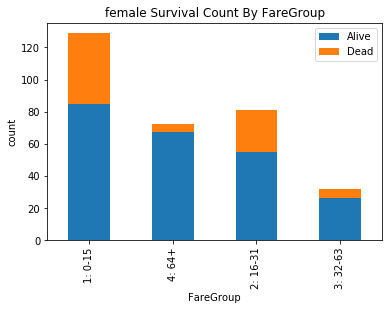

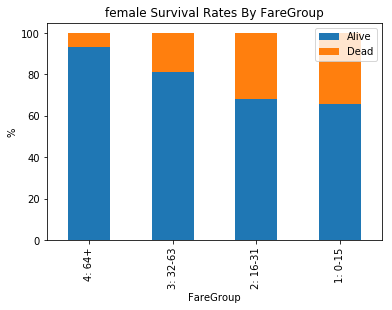

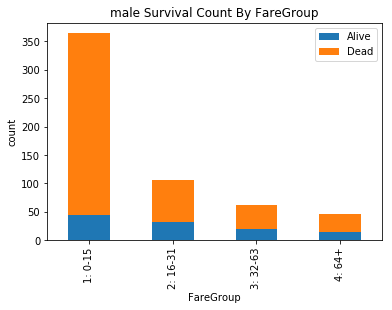

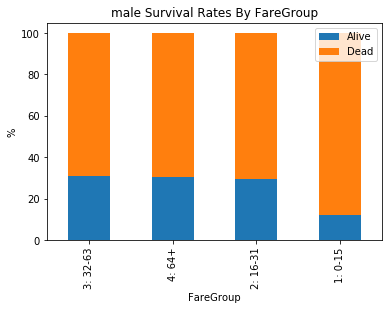

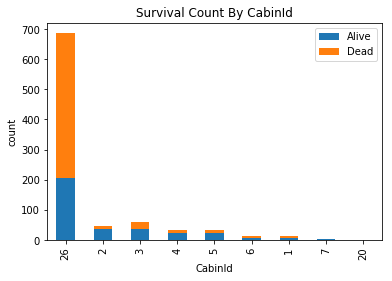

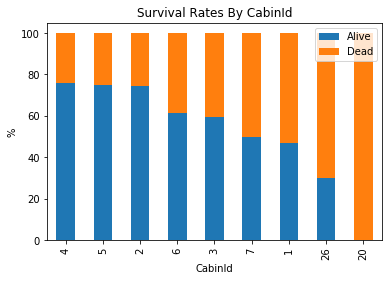

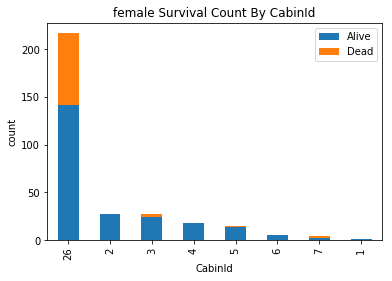

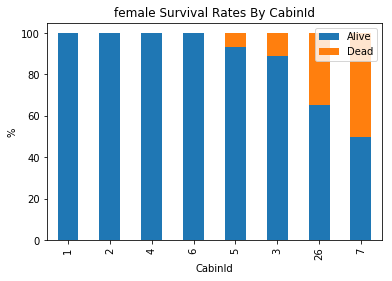

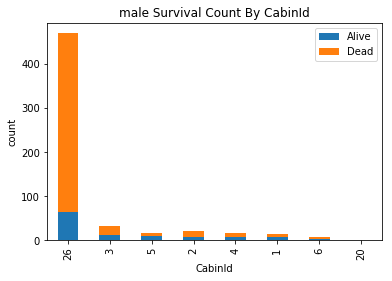

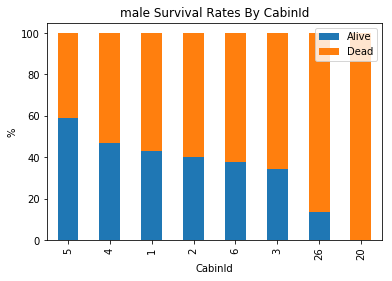

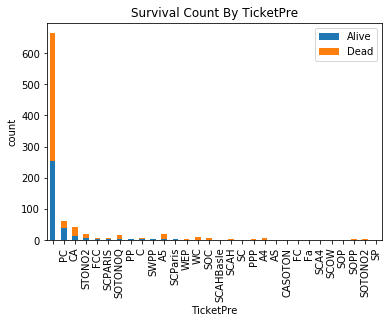

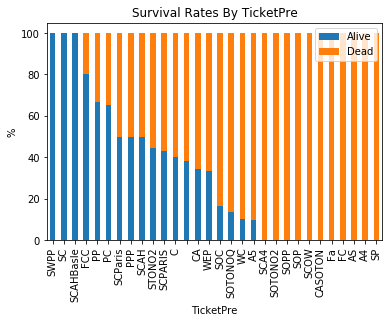

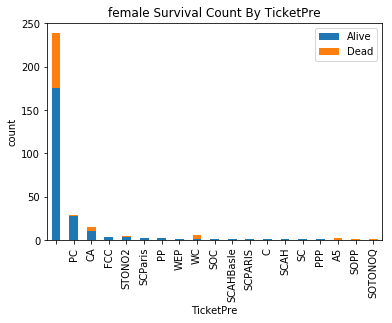

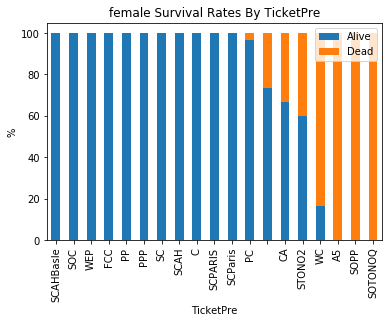

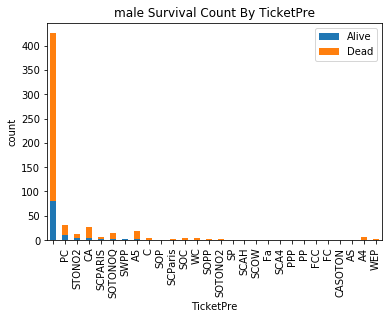

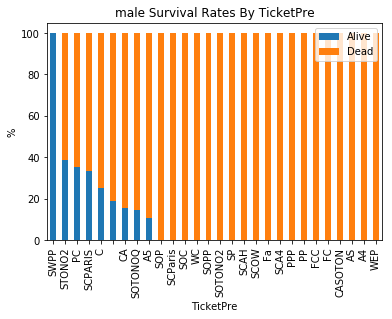

In [211]:
feature = []
for x in transform_df.columns:
    feature.append(x)
#position = feature.index('PassengerId')
#del feature[position]
position = feature.index('Survived')
del feature[position]
position = feature.index('Name')
del feature[position]
position = feature.index('Age')
del feature[position]
position = feature.index('Ticket')
del feature[position]
position = feature.index('TicketNum')
del feature[position]
position = feature.index('Fare')
del feature[position]
position = feature.index('Cabin')
del feature[position]
for xlabel in feature:
    plot_survival_count(alive, dead, 'Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(alive, dead, 'Survival Rates By '+xlabel, xlabel, '%')
    plot_survival_count(female_alive, female_dead, 'female Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(female_alive, female_dead, 'female Survival Rates By '+xlabel, xlabel, '%')
    plot_survival_count(male_alive, male_dead, 'male Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(male_alive, male_dead, 'male Survival Rates By '+xlabel, xlabel, '%')
    

In [40]:
AgeGroups = transform_df.groupby('AgeGroup').size().reset_index(name='count')
del AgeGroups['count']

if True:
    print("AgeGroups")
    print(AgeGroups)


AgeGroups
   AgeGroup
0   1: 0-20
1  2: 21-40
2  3: 41-60
3  4: 61-80


In [41]:
def my_correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

In [42]:
SibSp_group = transform_df.groupby('SibSp').size().reset_index(name='count')
SibSp_list = SibSp_group['SibSp']
Parch_group = transform_df.groupby('Parch').size().reset_index(name='count')
Parch_list = Parch_group['Parch']


In [43]:
def SibSp_Parch_Correlation(SibSp_df, Parch_df, Dead_or_Alive):

    for x in SibSp_list:
        table1 = SibSp_df[SibSp_df['SibSp']==x]
        merge_table1 = pd.merge(table1, AgeGroups, how='outer', on='AgeGroup')
        merge_table1['SibSp'].fillna(x, inplace=True)
        merge_table1[Dead_or_Alive].fillna(0, inplace=True)

        for y in Parch_list:
            table2 = Parch_df[Parch_df['Parch']==y]
            merge_table2 = pd.merge(table2, AgeGroups, how='outer', on='AgeGroup')
            merge_table2['Parch'].fillna(y, inplace=True)
            merge_table2[Dead_or_Alive].fillna(0, inplace=True)

            my_pearsons_r = my_correlation(merge_table1[Dead_or_Alive], merge_table2[Dead_or_Alive])
            if not math.isnan(my_pearsons_r):
                pearsons_r = np.corrcoef(merge_table1[Dead_or_Alive], merge_table2[Dead_or_Alive])
                print("")
                print(Dead_or_Alive+" SibSp["+str(x)+"]")
                print(Dead_or_Alive+" Parch["+str(y)+"]")
                print("my pearson's r = "+str(my_pearsons_r))
                print("vs pearson's r  = "+str(pearsons_r))

In [44]:
print("")
print("alive sibsp/parch correlation")
alive_SibSp = alive.groupby(['SibSp','AgeGroup']).size().reset_index(name='Alive')
alive_Parch = alive.groupby(['Parch','AgeGroup']).size().reset_index(name='Alive')
SibSp_Parch_Correlation(alive_SibSp, alive_Parch, 'Alive')
print("")
print("dead sibsp/parch correlation")
dead_SibSp = dead.groupby(['SibSp','AgeGroup']).size().reset_index(name='Dead')
dead_Parch = dead.groupby(['Parch','AgeGroup']).size().reset_index(name='Dead')
SibSp_Parch_Correlation(dead_SibSp, dead_Parch, 'Dead')



alive sibsp/parch correlation

Alive SibSp[0]
Alive Parch[0]
my pearson's r = 0.9887587711204934
vs pearson's r  = [[1.         0.98875877]
 [0.98875877 1.        ]]

Alive SibSp[0]
Alive Parch[1]
my pearson's r = 0.4770347455805875
vs pearson's r  = [[1.         0.47703475]
 [0.47703475 1.        ]]

Alive SibSp[0]
Alive Parch[2]
my pearson's r = 0.6008395204224299
vs pearson's r  = [[1.         0.60083952]
 [0.60083952 1.        ]]

Alive SibSp[0]
Alive Parch[3]
my pearson's r = 0.3762313509563047
vs pearson's r  = [[1.         0.37623135]
 [0.37623135 1.        ]]

Alive SibSp[0]
Alive Parch[5]
my pearson's r = -0.12103193564896716
vs pearson's r  = [[ 1.         -0.12103194]
 [-0.12103194  1.        ]]

Alive SibSp[1]
Alive Parch[0]
my pearson's r = 0.9068380007092443
vs pearson's r  = [[1.       0.906838]
 [0.906838 1.      ]]

Alive SibSp[1]
Alive Parch[1]
my pearson's r = 0.712169737487593
vs pearson's r  = [[1.         0.71216974]
 [0.71216974 1.        ]]

Alive SibSp[1]
Aliv

In [45]:
print("")
print("female alive sibsp/parch correlation")
female_alive_SibSp = female_alive.groupby(['SibSp','AgeGroup']).size().reset_index(name='Alive')
female_alive_Parch = female_alive.groupby(['Parch','AgeGroup']).size().reset_index(name='Alive')
SibSp_Parch_Correlation(female_alive_SibSp, female_alive_Parch, 'Alive')
print("")
print("female dead sibsp/parch correlation")
female_dead_SibSp = female_dead.groupby(['SibSp','AgeGroup']).size().reset_index(name='Dead')
female_dead_Parch = female_dead.groupby(['Parch','AgeGroup']).size().reset_index(name='Dead')
SibSp_Parch_Correlation(female_dead_SibSp, female_dead_Parch, 'Dead')
print("")
print("male alive sibsp/parch correlation")
male_alive_SibSp = male_alive.groupby(['SibSp','AgeGroup']).size().reset_index(name='Alive')
male_alive_Parch = male_alive.groupby(['Parch','AgeGroup']).size().reset_index(name='Alive')
SibSp_Parch_Correlation(male_alive_SibSp, male_alive_Parch, 'Alive')
print("")
print("male dead sibsp/parch correlation")
male_dead_SibSp = male_dead.groupby(['SibSp','AgeGroup']).size().reset_index(name='Dead')
male_dead_Parch = male_dead.groupby(['Parch','AgeGroup']).size().reset_index(name='Dead')
SibSp_Parch_Correlation(male_dead_SibSp, male_dead_Parch, 'Dead')



female alive sibsp/parch correlation

Alive SibSp[0]
Alive Parch[0]
my pearson's r = 0.9891738347633446
vs pearson's r  = [[1.         0.98917383]
 [0.98917383 1.        ]]

Alive SibSp[0]
Alive Parch[1]
my pearson's r = 0.7666345408999917
vs pearson's r  = [[1.         0.76663454]
 [0.76663454 1.        ]]

Alive SibSp[0]
Alive Parch[2]
my pearson's r = 0.8481208445593957
vs pearson's r  = [[1.         0.84812084]
 [0.84812084 1.        ]]

Alive SibSp[0]
Alive Parch[3]
my pearson's r = 0.4139929005301109
vs pearson's r  = [[1.        0.4139929]
 [0.4139929 1.       ]]

Alive SibSp[0]
Alive Parch[5]
my pearson's r = -0.07789891828399331
vs pearson's r  = [[ 1.         -0.07789892]
 [-0.07789892  1.        ]]

Alive SibSp[1]
Alive Parch[0]
my pearson's r = 0.9909042712117774
vs pearson's r  = [[1.         0.99090427]
 [0.99090427 1.        ]]

Alive SibSp[1]
Alive Parch[1]
my pearson's r = 0.7652547373822196
vs pearson's r  = [[1.         0.76525474]
 [0.76525474 1.        ]]

Alive S


Dead SibSp[5]
Dead Parch[4]
my pearson's r = 0.5773502691896257
vs pearson's r  = [[1.         0.57735027]
 [0.57735027 1.        ]]

Dead SibSp[5]
Dead Parch[5]
my pearson's r = 0.8703882797784894
vs pearson's r  = [[1.         0.87038828]
 [0.87038828 1.        ]]

Dead SibSp[5]
Dead Parch[6]
my pearson's r = 1.0000000000000002
vs pearson's r  = [[1. 1.]
 [1. 1.]]

Dead SibSp[8]
Dead Parch[0]
my pearson's r = -0.07087387592709365
vs pearson's r  = [[ 1.         -0.07087388]
 [-0.07087388  1.        ]]

Dead SibSp[8]
Dead Parch[1]
my pearson's r = 0.2705008904002297
vs pearson's r  = [[1.         0.27050089]
 [0.27050089 1.        ]]

Dead SibSp[8]
Dead Parch[2]
my pearson's r = 0.7011695914588867
vs pearson's r  = [[1.         0.70116959]
 [0.70116959 1.        ]]

Dead SibSp[8]
Dead Parch[3]
my pearson's r = 1.0
vs pearson's r  = [[1. 1.]
 [1. 1.]]

Dead SibSp[8]
Dead Parch[4]
my pearson's r = 0.5773502691896257
vs pearson's r  = [[1.         0.57735027]
 [0.57735027 1.        ]]




alive SibSp/Parch pearson's r


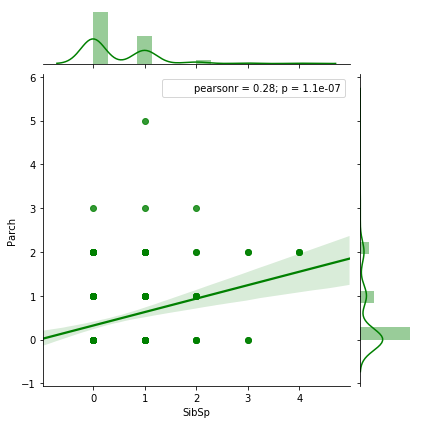


dead SibSp/Parch pearson's r


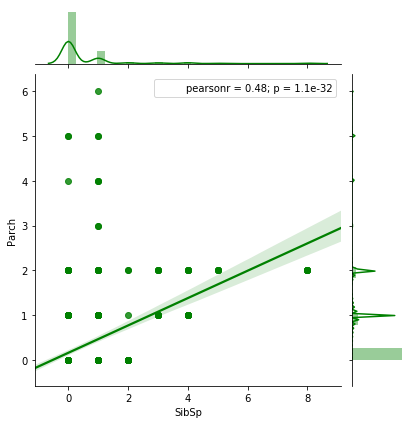

In [46]:
print("")
print("alive SibSp/Parch pearson's r")
sns.jointplot(data=alive, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()
print("")
print("dead SibSp/Parch pearson's r")
sns.jointplot(data=dead, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()



female alive SibSp/Parch pearson's r


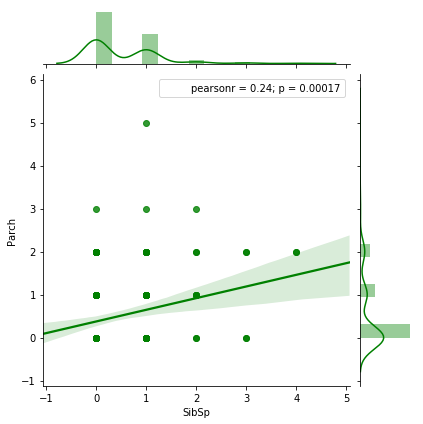


female dead SibSp/Parch pearson's r


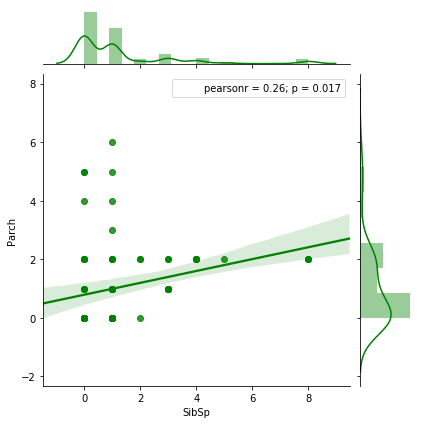


male alive SibSp/Parch pearson's r


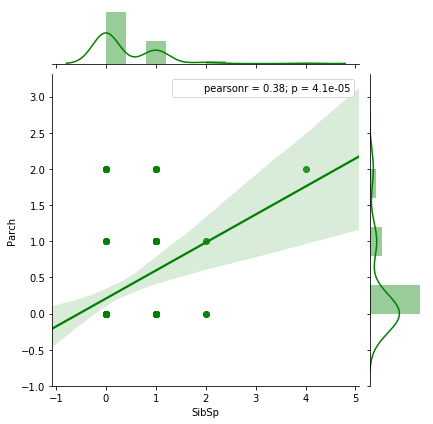


male dead SibSp/Parch pearson's r


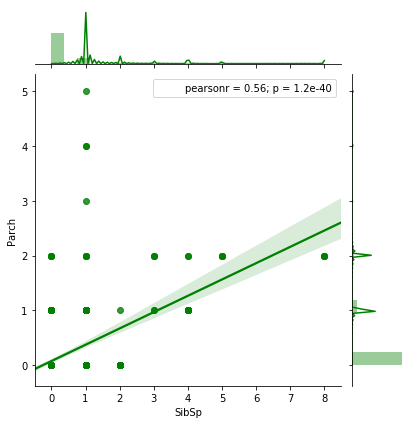

In [47]:
print("")
print("female alive SibSp/Parch pearson's r")
sns.jointplot(data=female_alive, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()
print("")
print("female dead SibSp/Parch pearson's r")
sns.jointplot(data=female_dead, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()
print("")
print("male alive SibSp/Parch pearson's r")
sns.jointplot(data=male_alive, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()
print("")
print("male dead SibSp/Parch pearson's r")
sns.jointplot(data=male_dead, x='SibSp', y='Parch', kind='reg', color='g')
plt.show()
